## Introduction

Fluid dynamics are governed by the famous Navier Stokes equations, which at their core express the conservation of momentum within a general fluid in a general environment [1].  However, despite their apparent simplicity, the general form of these equations are exceedingly challenging to solve [1].  In many general cases, the equations are actually impossible to solve [2].

The impossibility of solving these equations is caused by their complexity, with the equations consisting of a large number of inter-related components, but also by the non-linear combination of these terms [1].  This inherent non-linearity results in equations that are particularly challenging to solve numerically leading to impractical computational requirements and timescales [3].

Add on to this our relatively immature understanding of and ability to model turbulence within flows, and it quickly becomes evident why a general solution to the Navier Stokes equations remains one of the last remaining unsolved challenges in applied mathematics and science [4].

For these key reasons, considerable effort has been placed into devising numerical methods capable of efficiently and accurately solving variants of the full Navier Stokes equations.  

Primarily, these efforts have been concentrated in two key areas.  Firstly, efficient numerical schemes have been devised to reduce the computational workload of solving the equations as well as increase the resulting accuracy for a given computational complexity (such as Spectral Methods or Fractional Time Splitting) [5].  Secondly, simplifications have been sought to the full Navier Stokes equations which are aimed at reducing the overall complexity of the equations being solved [3].

These simplifications almost universally require the introduction of assumptions into our consideration of a given flow scenario, and these assumptions typically reduce the accuracy of the obtained results [6].  However, by carefully considering the flow scenario in question, assumptions can be chosen which still maintain numerical results which have acceptable accuracy compared to the real-world flow [6].

In doing so, these assumptions are then able to reduce the complexity of the full Navier Stokes equations being considered, resulting in a numerically tractable form of the equations.

These aforementioned assumptions can include many forms including assumptions regarding the boundary conditions of the flow field, the pressure variations and the velocity variations within the domain.  However, one of the most effective simplifications possible (in terms of reducing computational complexity) in the assumption of inviscid behaviour [6].  By assuming all viscous effects to be negligible within the fluid being simulated, the most complex of terms within the Navier Stokes equations can be reduced to zero leading to significantly more performant numerical algorithm [7].

Crucially however, when applied in the right conditions, these simplifications can have exceedingly small effects on the accuracy of the simulated flow field [7].  This means that we gain significant performance benefits for very little (if any) detectable errors in our final solutions.  Even in situations where the assumptions introduce a relatively larger error, these can still be deemed to be acceptable so long as the regions of inaccuracy and type of inaccuracy in the final solution are well understood [8].

For these reasons, even today in the age of high power computing, many fluid studies ranging from wind turbine design to aircraft design begin with simulations built on the Euler equations and their associated simplifications [8].  Because of its importance, we will embark on a detailed analysis of the Euler equations and the numerical methods commonly used to solve them.  In doing so, we will investigate the rates of convergence and accuracy of a range of methods before finally investigating potential complications that can be re-introduced to the Euler equations to help it better represent real world flows in complex fluid scenarios.

## Numerical Background

We start by writing down some of the Navier-Stokes equations. The Navier-Stokes equations can be used to model the weather, ocean currents, water flow in a pipe and air flow around a wing.

The 2D Navier-Stokes equations:

$\frac{\partial \omega}{\partial t}+ (u \cdot \nabla) \omega = \frac{1}{Re} \nabla^2 \omega$

$\nabla^2 u = e_z \times  \nabla \omega$

$e_z \cdot \nabla \times  u= \omega$

$u=0$

our domain $\Omega = [-1, 1] \times  [-1,1]$

Temporal discretization:

On the 2D Navier-Stokes equations we can perfomr AB, Crank Nicolson which give 2nd order accuracy. We can use a 2nd order Runge-Kutta scheme for the first time step.

Spatial Discretization:

We can use Finite differences.
https://www.slideserve.com/lyle/solution-of-2d-navier-stokes-equations-in-velocity-vorticity-formulation-using-fd

The 1-D flow of an inviscid and compressible gas obeys the conservation laws for mass, momentum and energy:

$$\frac{\partial U}{\partial t} + \frac{\partial F(U)}{\partial x}=0$$

$$U=\begin{pmatrix}
p \\
m \\
e
\end{pmatrix},F=\begin{pmatrix}
m \\
(m^2/p)+p \\
(e+p)m/p
\end{pmatrix}$$

We can write down the 1D Navier-Stokes equation:

$u_t +u u_x = \nu u_{xx}$

Notice that this equation is missing the pressure gradient

Where $\nu$ is the kinemati viscosity or $\frac{1}{Re}$.

We can do a basic discretization (forward eular in time, central difference in space):

$\frac{U^{n+1}_j - U^n_j}{\Delta t} + U^n_{j} \frac{  U^n_{j+1} - U^n_{j-1}}{2 \Delta x} = \nu \frac{1}{\Delta x^2} (U^n_{j-1} - 2 U^n_j + U^n_{j+1})$

The 2D Navier-Stokes equations:

$\frac{\partial u}{\partial t}+ (u \cdot \nabla) u = -1/ \rho \nabla p+\frac{1}{Re} \nabla^2 u$

$\nabla \cdot u=0$

$u$ is velocity

$p$ is pressure

$1/Re$ is kinematic viscosity ($\nu$)

$\rho$ is density

$-1/ \rho \nabla p$ is the pressure gradient

For 2D Navier-Stokes we need to solve the following:

$u_t + u u_x + v u_y = \nu u_{xx} + \nu u_{yy}$

$v_t + u v_x + v v_y = \nu v_{xx} + \nu v_{yy}$

The 2D Laplacian can be discretized like so:

$\nabla ^2 f(x,y)= \frac{f(x-\Delta x,y) + f(x+\Delta x,y) + f(x,y-\Delta x) + f(x,y+\Delta x)- 4f(x,y)}{\Delta x^2}$

The incompressiblity condition is enforced by using a Poisson equation. We 
iteratively solve the pressure Poisson equations using tentative velocities.
We later correct our velocities using the pressure.

$\frac{\Delta^2 p(t+\Delta t)}{\Delta x^2}+\frac{\Delta^2 p(t+\Delta t)}{\Delta y^2}=-\frac{\rho}{\Delta t} (\frac{\Delta u^*(t)}{\Delta x}+\frac{\Delta u^*(t)}{\Delta y})$

Correction:

$u(t+\Delta t)=u^*(t) + \Delta t (-\frac{1}{\rho} \frac{\Delta p}{\Delta x})$

In [29]:
#imports and settings
%matplotlib inline
%precision 16

import numpy
import matplotlib.pyplot as plt

In [30]:
###useful classes
class Fluid:
    def __init__(self,rho,mu):
        self.setter(rho,mu)
    
    def setter(self,rho,mu):
        #density
        self.rho=rho
        #viscosity
        self.mu=mu
        
# 2D Domain class that holds the meshgrid, time etc..
class Domain2D:
    def __init__(self,L_B = 0.0,R_B = 1.0,m=50,t_0=0.0, t_final=1.0,num_dimernsions=2):
        
        if (num_dimernsions==2):
            self.m = m
            self.x =grid_points(L_B, R_B, m, grid_type='uniform')
            self.y =grid_points(L_B, R_B, m, grid_type='uniform')
            
            self.delta_x = self.x[1]-self.x[0]
            self.delta_y = self.y[1]-self.y[0]

            cfl=0.01
            self.delta_t = cfl * self.delta_x

            t = numpy.arange(t_0, t_final, self.delta_t)
            self.N = len(t)

            self.X, self.Y = numpy.meshgrid(self.x, self.y)
        else:
            raise NotImplementedError("Domain only supports 2D")
    def reset_domain(self):
        self.X, self.Y = numpy.meshgrid(self.x, self.y)
            
###useful functions
def grid_points(a, b, m, grid_type='uniform'):
    """Returns a set of m grid points between a and b
    
    The parameter `grid_type` determines what the distribution of 
    points is.
     - grid_type = 'uniform' - Uniform distribution of points
     - grid_type = 'right_layer' - Clustered near right boundary
     - grid_type = 'random' - Randomly distributed
     - grid_type = 'chebyshev' - Chebyshev extreme points
    """
    # Computational grid
    z = numpy.linspace(0, 1, m + 2)
    
    if grid_type.lower() == "uniform":
        x = a + (b - a) * z
    elif grid_type.lower() == "right_layer":
        x = a + (b - a) * (1.0 - (1.0 - z)**2)
    elif grid_type.lower() == "random":
        x = numpy.empty(m + 2)
        x[1:-1] = a + (b - a) * numpy.sort(numpy.random.uniform(size=(m)))
        x[0] = a
        x[-1] = b
    elif grid_type.lower() == "chebyshev":
        x = a + (b - a) * 0.5 * (1.0 + numpy.cos(numpy.pi * (1.0 - z)))
    else:
        raise ValueError("Unknown grid type.")
    
    return x

def take_2D_Central_difference(U, delta_x, direction ='x', n = 0):
    """Returns the central difference of a 2D vector in the x direction
        - n = time slice
        - direction = can either be 'x' or 'y'
    """
    diff = numpy.zeros_like(U)
    # if the ndim is == 2 then there is no time value 
    if (U.ndim == 2):
        if (direction=='x'):
            diff[1:-1, 1:-1] = (U[1:-1,2:] - U[1:-1,:-2]) / (2.0 * delta_x)
            return diff
        elif (direction=='y'):
            diff[1:-1, 1:-1] = (U[2:,1:-1] - U[:-2,1:-1]) / (2.0 * delta_x)
            return  diff
    # if the ndim is == 3 the first index is the time slice 
    elif (U.ndim == 3):
        if (direction=='x'):
            diff[n ,1:-1, 1:-1] = (U[n,1:-1,2:] - U[n,1:-1,:-2]) / (2.0 * delta_x)
            return diff
        elif (direction=='y'):
            diff[n ,1:-1, 1:-1] = (U[n,2:,1:-1] - U[n,:-2,1:-1]) / (2.0 * delta_x)
            return diff
        
    raise RuntimeError("Unknown number of dimensions or direction")
    
def take_2D_Central_difference_2nd_derivative(U, delta_x, direction ='x', n = 0):
    """Returns the central difference of a 2D vector in the x direction
        - n = time slice
        - direction = can either be 'x' or 'y'
    """
    diff = numpy.zeros_like(U)
    # if the ndim is == 2 then there is no time value 
    if (U.ndim == 2):
        if (direction=='x'):
            diff[1:-1, 1:-1] = (U[1:-1,2:] - 2.0*U[1:-1,1:-1] + U[1:-1,:-2]) / (delta_x**2)
            return diff
        elif (direction=='y'):
            diff[1:-1, 1:-1] = (U[2:,1:-1] - 2.0*U[1:-1,1:-1] + U[:-2,1:-1]) / (delta_x**2)
            return  diff
    # if the ndim is == 3 the first index is the time slice 
    elif (U.ndim == 3):
        if (direction=='x'):
            diff[n ,1:-1, 1:-1] = (U[n,1:-1,2:] - 2.0*U[n ,1:-1,1:-1] + U[n,1:-1,:-2]) / (delta_x**2)
            return diff
        elif (direction=='y'):
            diff[n ,1:-1, 1:-1] = (U[n,2:,1:-1] - 2.0*U[n ,1:-1,1:-1] + U[n,:-2,1:-1]) / (delta_x**2)
            return diff
        
    raise RuntimeError("Unknown number of dimensions or direction")
    
def laplace(f,delta_x):
        diff = numpy.zeros_like(f)
        diff[1:-1, 1:-1]=(f[1:-1,:-2]+f[:-2,1:-1]-4*f[1:-1,1:-1]+f[1:-1,2:]+f[2:,1:-1])/(delta_x**2)
        return diff

def RK2_2D(delta_t, U_0,a,b):
    """ implement constant step size 2 stage Runge-Kutta Method RK2"""
    
    u = numpy.zeros((t.shape[0],len(U_0)))
    u[0, :] = U_0
    delta_t = t[1] - t[0]
    
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(a,b, u[n])
        K_2 = delta_t * f(a,b,u[n] + K_1*0.5)
        u[n+1] = u[n] + K_2
        # we only care about the first step
        break
    return u

def solve_pressure_poisson(N_PRESSURE_POISSON_ITERATIONS,density,delta_t,delta_x,
                           u_tent,v_tent,p_prev):
    
    d_u_tent__d_x = take_2D_Central_difference(u_tent, delta_x, direction ='x')
    d_v_tent__d_y = take_2D_Central_difference(v_tent, delta_x, direction ='y')
    
    # Compute a pressure correction by solving the pressure-poisson equation
    rhs = (density / delta_t*(d_u_tent__d_x+d_v_tent__d_y))
    
    for _ in range(N_PRESSURE_POISSON_ITERATIONS):
        p_next = numpy.zeros_like(p_prev)
        p_next[1:-1, 1:-1] = 1/4 * (
            +
            p_prev[1:-1, 0:-2]
            +
            p_prev[0:-2, 1:-1]
            +
            p_prev[1:-1, 2:  ]
            +
            p_prev[2:  , 1:-1]
            -
            delta_x**2
            *
            rhs[1:-1, 1:-1]
        )

        # Pressure Boundary Conditions: Homogeneous Neumann Boundary
        # Conditions everywhere except for the top and bottom, where it is a
        # homogeneous Dirichlet BC
        p_next[:, -1] = p_next[:, -2]
        p_next[0,  :] = 0.0 #p_next[1,  :]
        p_next[:,  0] = p_next[:,  1]
        p_next[-1, :] = 0.0

        p_prev = p_next
    return p_next
    
def solve_navier_stokes_2D_FTCS(space, fluid, all_time_steps=False):
    STABILITY_SAFETY_FACTOR = 0.5
    HORIZONTAL_VELOCITY_BOTTOM = -1.0
    HORIZONTAL_VELOCITY_TOP = 1.0
    N_PRESSURE_POISSON_ITERATIONS = 50
    
    maximum_possible_time_step_length = (
        0.5 * space.delta_x**2 / fluid.mu
    )
    if space.delta_t > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")
    
    u_prev = numpy.zeros_like(space.X)
    v_prev = numpy.zeros_like(space.X)
    p_prev = numpy.zeros_like(space.X)

    if (all_time_steps==True):    
        # Solution array
        U_u = numpy.empty((space.N + 1,space.m+2,space.m+2))
        U_v = numpy.empty((space.N + 1,space.m+2,space.m+2))
        U_p = numpy.empty((space.N + 1,space.m+2,space.m+2))
        U_u[0,:,:] = u_prev
        U_v[0,:,:] = v_prev
        U_p[0,:,:] = p_prev

    # Time stepping loop
    for time_val in range(space.N):
        #𝑢_𝑥 = (𝑈^𝑛_{𝑗+1}−𝑈^𝑛_{𝑗−1})/2Δ𝑥
        u_x_prev = take_2D_Central_difference(u_prev, space.delta_x, direction ='x')
        u_y_prev = take_2D_Central_difference(u_prev, space.delta_x, direction ='y')
        v_x_prev = take_2D_Central_difference(v_prev, space.delta_x, direction ='x')
        v_y_prev = take_2D_Central_difference(v_prev, space.delta_x, direction ='y')
        laplace__u_prev = laplace(u_prev, space.delta_x)
        laplace__v_prev = laplace(v_prev, space.delta_x)

        # Perform a tentative step by solving the momentum equation without the
        # pressure gradient
        u_tent =(u_prev+space.delta_t*(-(u_prev*u_x_prev+v_prev*u_y_prev)+fluid.mu*laplace__u_prev))
        v_tent =(v_prev+space.delta_t*(-(u_prev*v_x_prev+v_prev*v_y_prev)+fluid.mu*laplace__v_prev))

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_tent[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_tent[:, 0] = 0.0
        u_tent[:, -1] = 0.0
        u_tent[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_tent[0, :] = 0.0
        v_tent[:, 0] = 0.0
        v_tent[:, -1] = 0.0
        v_tent[-1, :] = 0.0

        p_next = solve_pressure_poisson(N_PRESSURE_POISSON_ITERATIONS,fluid.rho,space.delta_t,
                                        space.delta_x, u_tent,v_tent,p_prev)

        d_p_next__d_x = take_2D_Central_difference(p_next, space.delta_x, direction ='x')
        d_p_next__d_y = take_2D_Central_difference(p_next, space.delta_x, direction ='y')

        # Correct the velocities such that the fluid stays incompressible
        u_next = (u_tent-space.delta_t / fluid.rho*d_p_next__d_x)
        v_next = (v_tent-space.delta_t / fluid.rho*d_p_next__d_y)

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_next[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_next[:, 0] = 0.0
        u_next[:, -1] = 0.0
        u_next[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_next[0, :] = 0.0
        v_next[:, 0] = 0.0
        v_next[:, -1] = 0.0
        v_next[-1, :] = 0.0

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next
        
        if (all_time_steps==True):
            U_u[time_val+1,:,:] = u_prev
            U_v[time_val+1,:,:] = v_prev
            U_p[time_val+1,:,:] = p_prev
        
    if (all_time_steps==True):
        return space.X,space.Y,U_u,U_v,U_p
    
    return space.X,space.Y,u_next,v_next,p_next

def solve_navier_stokes_2D_CN(space, fluid):
    HORIZONTAL_VELOCITY_BOTTOM = -1.0
    HORIZONTAL_VELOCITY_TOP = 1.0
    N_PRESSURE_POISSON_ITERATIONS = 50
    STABILITY_SAFETY_FACTOR = 0.5

    u_prev = numpy.zeros_like(space.X)
    v_prev = numpy.zeros_like(space.X)
    p_prev = numpy.zeros_like(space.X)
    
    u_n_plus_one = numpy.zeros_like(space.X)
    v_n_plus_one = numpy.zeros_like(space.X)

    maximum_possible_time_step_length = (
        0.5 * space.delta_x**2 / fluid.mu
    )
    if space.delta_t > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")

    # Time stepping loop
    for _ in range(space.N):
        #𝑢_𝑥 = (𝑈^𝑛_{𝑗+1}−𝑈^𝑛_{𝑗−1})/2Δ𝑥
        u_x_prev = take_2D_Central_difference(u_prev, space.delta_x, direction ='x')
        u_y_prev = take_2D_Central_difference(u_prev, space.delta_x, direction ='y')
        
        u_x_n_plus_one = take_2D_Central_difference(u_n_plus_one, space.delta_x, direction ='x')
        u_y_n_plus_one = take_2D_Central_difference(u_n_plus_one, space.delta_x, direction ='y')
        
        v_x_prev = take_2D_Central_difference(v_prev, space.delta_x, direction ='x')
        v_y_prev = take_2D_Central_difference(v_prev, space.delta_x, direction ='y')
        
        v_x_n_plus_one = take_2D_Central_difference(v_n_plus_one, space.delta_x, direction ='x')
        v_y_n_plus_one = take_2D_Central_difference(v_n_plus_one, space.delta_x, direction ='y')
        
        u_xx_prev = take_2D_Central_difference_2nd_derivative(u_prev, space.delta_x, direction ='x')
        u_yy_prev = take_2D_Central_difference_2nd_derivative(u_prev, space.delta_x, direction ='y')
        
        u_xx_n_plus_one = take_2D_Central_difference_2nd_derivative(u_n_plus_one,
                                                                   space.delta_x, direction ='x')
        u_yy_n_plus_one = take_2D_Central_difference_2nd_derivative(u_n_plus_one,
                                                                   space.delta_x, direction ='y')
        
        v_xx_prev = take_2D_Central_difference_2nd_derivative(v_prev, space.delta_x, direction ='x')
        v_yy_prev = take_2D_Central_difference_2nd_derivative(v_prev, space.delta_x, direction ='y')
        
        v_xx_n_plus_one = take_2D_Central_difference_2nd_derivative(v_n_plus_one,
                                                                   space.delta_x, direction ='x')
        v_yy_n_plus_one = take_2D_Central_difference_2nd_derivative(v_n_plus_one,
                                                                   space.delta_x, direction ='y')

        # Perform a tentative step by solving the momentum equation without the
        # pressure gradient
        u_tent =(u_prev+space.delta_t*(-((u_prev/2.0)*(u_x_prev+u_x_n_plus_one)+ \
                                   (v_prev/2.0)*(u_y_prev+u_y_n_plus_one))+ \
                                 fluid.mu*(u_xx_prev+u_yy_prev+u_xx_n_plus_one+u_yy_n_plus_one)))
        v_tent =(v_prev+space.delta_t*(-((u_prev/2.0)*(v_x_prev+v_x_n_plus_one)+ \
                                   (v_prev/2.0)*(v_y_prev+v_y_n_plus_one))+ \
                                 fluid.mu*(v_xx_prev+v_yy_prev+v_xx_n_plus_one+v_yy_n_plus_one)))

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_tent[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_tent[:, 0] = 0.0
        u_tent[:, -1] = 0.0
        u_tent[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_tent[0, :] = 0.0
        v_tent[:, 0] = 0.0
        v_tent[:, -1] = 0.0
        v_tent[-1, :] = 0.0

        p_next = solve_pressure_poisson(N_PRESSURE_POISSON_ITERATIONS,fluid.rho,space.delta_t,
                                        space.delta_x,u_tent,v_tent,p_prev)
        
        d_p_next__d_x = take_2D_Central_difference(p_next, space.delta_x, direction ='x')
        d_p_next__d_y = take_2D_Central_difference(p_next, space.delta_x, direction ='y')

        # Correct the velocities such that the fluid stays incompressible
        u_next = (u_tent-space.delta_t / fluid.rho*d_p_next__d_x)
        v_next = (v_tent-space.delta_t / fluid.rho*d_p_next__d_y)

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_next[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_next[:, 0] = 0.0
        u_next[:, -1] = 0.0
        u_next[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_next[0, :] = 0.0
        v_next[:, 0] = 0.0
        v_next[:, -1] = 0.0
        v_next[-1, :] = 0.0

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next
        
    return X,Y,u_next,v_next,p_next

In [31]:
##we initialize all our objects that we plan to use
olive_oil=Fluid(0.9,5.62)
sea_water=Fluid(1.03,0.1)
water=Fluid(1.0,0.1)

spacetime = Domain2D()

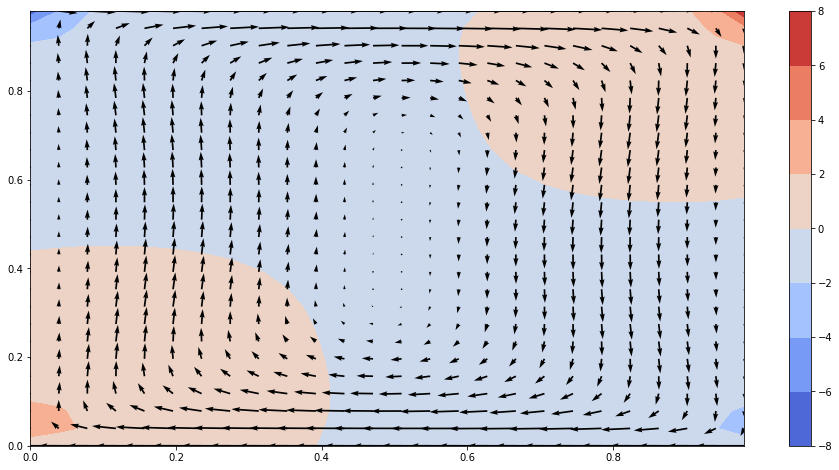

In [13]:
X,Y,u_next,v_next,p_next = solve_navier_stokes_2D_FTCS(spacetime, water)

# The [::2, ::2] selects only every second entry (less cluttering plot)
#plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="coolwarm")
plt.colorbar()

plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
# plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
#plt.xlim((0, 1))
#plt.ylim((0, 1))
plt.show()

Below we create an animation to visually show the progression of our swirling motion.

In [14]:
#########Animation#######
from matplotlib.animation import FuncAnimation
#from matplotlib import cm
# Enable interactive plot
%matplotlib notebook

##initialization
spacetime.reset_domain()

X,Y,U,V,P = solve_navier_stokes_2D_FTCS(spacetime, water,all_time_steps=True)
fig, ax = plt.subplots(figsize=(8,8))
u=U[1]
v=V[1]
p=P[1]
Q = ax.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2], color="black")

def animate(i,Q,X,Y):
    u=U[i]
    v=V[i]
    p = P[i]
    Q.set_UVC(u[::2, ::2],v[::2, ::2], p[::2, ::2])
    ax.set_title("t="+str(i))
    return Q,
    
ani = FuncAnimation(fig, animate,fargs=(Q,X,Y)
                    ,frames=U.shape[0],interval=10, repeat=False, blit=False)

plt.show()

<IPython.core.display.Javascript object>

The 2D Navier-Stokes equations without the pressure gradient:

$\frac{\partial \omega}{\partial t}+ (u \cdot \nabla) \omega = \frac{1}{Re} \nabla^2 \omega$

Crank Nicholson:
$$\frac{U^{n+1}_{ij} - U^n_{ij}}{\Delta t} + \frac{u_{ij}^n}{2}(\frac{U_{ij+1}^{n+1} - U_{ij-1}^{n+1}}{2 \Delta x} + \frac{U_{ij+1}^{n} - U_{ij-1}^{n}}{2 \Delta x})+\frac{v_{ij}^n}{2}(\frac{U_{i+1j}^{n+1} - U_{i-1j}^{n+1}}{2 \Delta y} + \frac{U_{i+1 j}^{n} - U_{i-1 j}^{n}}{2 \Delta y})=\frac{1}{Re}(\frac{U^n_{ij-1} - 2 U^n_{ij} + U^n_{ij+1} + U^{n+1}_{ij-1} - 2 U^{n+1}_{ij} + U^{n+1}_{ij+1}}{2 \Delta x^2} + \frac{U^n_{i-1j} - 2 U^n_{ij} + U^n_{i+1j} + U^{n+1}_{i-1j} - 2 U^{n+1}_{ij} + U^{n+1}_{i+1j}}{2 \Delta y^2} )$$

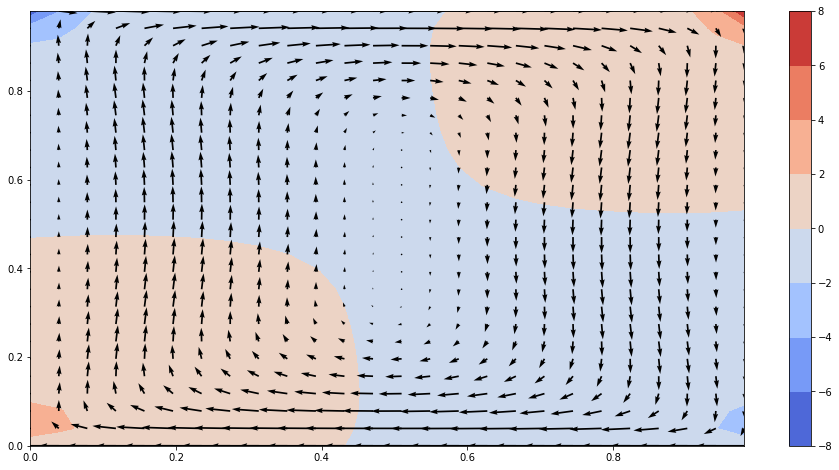

In [28]:
##initialization
spacetime.reset_domain()

X,Y,u_next,v_next,p_next = solve_navier_stokes_2D_CN(spacetime, sea_water)

# The [::2, ::2] selects only every second entry (less cluttering plot)
#plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="coolwarm")
plt.colorbar()

plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
# plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
#plt.xlim((0, 1))
#plt.ylim((0, 1))
plt.show()

## Adams Bashforth

Another class of explicit methods capable of solving the simplified Navier Stokes equations outlined above is the Adams Bashforth methods.  Specifically, these methods make use of Polynomial Interpolation to provide a multistep approximation to a particular function [11].  Each step is thus some explicit combination of the previous step, as well as a range of previous steps.

The Adams Bashforth methods use the Lagrange Formula for the creation of a interpolating polynomial up to order $n-1$, and in so doing, are able to create a unique explicit formula for a particular $n$-step method [11].

The interpolation polynomial function is shown below [11].

$$
p(t) = \sum_{j=0}^{s-1} \frac{(-1)^{s-j-1} f(t_{n+j},y_{n+j})}{j! (s-j-1)! h^{s-1}} \prod_{i=0, i\neq j}^{s-1} (t - t_{n+i})
$$

In creating this interpolating polynomial, an assumption is made that the polynomial is able to sufficiently capture the right side of a given ODE $y'(t) = p(t)$, where $p(t)$ is the polynomial found above [11].

The acceptance of this assumption then allows for the for the following exact solution of the polynomial [11]:

$$
y_{n+s} = y_{n+s-1} + \int_{t_{n+s-1}}^{t_{n+s}} p(t) dt
$$

We can then arrive at the final Adams Bashforth method by making a substitution for the pre-multiplying term of the above interpolating polynomial to determine the series of $b$ coefficients for a given $s$ order Adams-Bashforth method [11].  The equation for determining the Adams-Bashforth method is shown below [11], where $j$ ranges for a given step of a given order method [11].

$$
b_{s-j-1} = \frac{(-1)^j}{j! (s-j-1)!} \int_0^1 \prod_{i=0,i\neq j}^{s-1} (u+i) du
$$

The result of this analysis is the following $n$ order Adams-Bashforth methods, note that the first order method is simply the Euler method [11].

$$
y_{n+1} = y_n + h f(t_n,y_n)
$$

$$
y_{n+2} = y_{n+1} + h \left( \frac{3}{2} f(t_{n+1},y_{n+1}) - \frac{1}{2}f(t_n,y_n) \right)
$$

$$
y_{n+3} = y_{n+2} + h \left( \frac{23}{12} f(t_{n+2},y_{n+2}) - \frac{16}{12} f(t_{n+1},y_{n+1}) + \frac{5}{12}f(t_n,y_n) \right)
$$

$$
y_{n+4} = y_{n+3} + h \left( \frac{55}{24} f(t_{n+3},y_{n+3}) - \frac{59}{24} f(t_{n+2},y_{n+2}) + \frac{37}{24} f(t_{n+1},y_{n+1}) - \frac{9}{24}f(t_n,y_n) \right)
$$

$$
y_{n+5} = y_{n+4} + h \left( \frac{1901}{720} f(t_{n+4},y_{n+4}) - \frac{2774}{720} f(t_{n+3},y_{n+3}) + \frac{2616}{720} f(t_{n+2},y_{n+2}) - \frac{1274}{720} f(t_{n+1},y_{n+1}) + \frac{251}{720}f(t_n,y_n) \right)
$$


With the Adams Bashforth method derived in general, we will now turn our attention to applying these methods to the simplified version of the Navier-Stokes equations considered within this project.

At each iteration of the simulation, it becomes apparent that the Adams Bashforth method can be applied in two places within each iteration.

The first place is in the calculation of the temporary velocities prior to the inclusion of the pressure correction.  At this stage, an incremental step is taken to create a new estimate of the velocity which is then used to implement a velocity based pressure correction.  This type of velocity incrementation is the perfect implementation of the Adams Bashforth method since an increase in accuracy order here will allow for a more accurate solution to propagate through each increment.

The second place for the inclusion of the Adams Bashforth method is in the updating of the velocity with the inclusion of the pressure correction.  In a similar manner to the first inclusion of the Adams Bashforth method, using the AB method to update the final iteration of the velocity allows for the associated accuracy order increases with increasing AB method order.

The code below defines a solver which makes use of the Adams Bashforth methods to perform iterations of the simplified Navier Stokes equation simulations, and plots the results for visualization.

In [33]:
def solve_navier_stokes_2D_Adams_Bashford(space, fluid, all_time_steps=False,n_adams_bashford_steps=2):
    HORIZONTAL_VELOCITY_BOTTOM = -1.0
    HORIZONTAL_VELOCITY_TOP = 1.0
    N_PRESSURE_POISSON_ITERATIONS = 50
    STABILITY_SAFETY_FACTOR = 0.5

    u_prev = numpy.zeros_like(space.X)
    v_prev = numpy.zeros_like(space.X)
    p_prev = numpy.zeros_like(space.X)

    maximum_possible_time_step_length = (
        0.5 * space.delta_x**2 / fluid.mu
    )
    if space.delta_t > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")
    
    if (all_time_steps==True):    
        # Solution array
        U_u = numpy.empty((space.N + 1,space.m+2,space.m+2))
        U_v = numpy.empty((space.N + 1,space.m+2,space.m+2))
        U_p = numpy.empty((space.N + 1,space.m+2,space.m+2))
        U_u[0,:,:] = u_prev
        U_v[0,:,:] = v_prev
        U_p[0,:,:] = p_prev

    # Time stepping loop
    for time_val in range(space.N):
        #𝑢_𝑥 = (𝑈^𝑛_{𝑗+1}−𝑈^𝑛_{𝑗−1})/2Δ𝑥
        u_x_prev = take_2D_Central_difference(u_prev, space.delta_x, direction ='x')
        u_y_prev = take_2D_Central_difference(u_prev, space.delta_x, direction ='y')
        v_x_prev = take_2D_Central_difference(v_prev, space.delta_x, direction ='x')
        v_y_prev = take_2D_Central_difference(v_prev, space.delta_x, direction ='y')
        laplace__u_prev = laplace(u_prev, space.delta_x)
        laplace__v_prev = laplace(v_prev, space.delta_x)

        # Depending on which AB method is chosen, apply the formula
        if n_adams_bashford_steps == 1:
            u_tent =(u_prev+delta_t*(-(u_prev*u_x_prev+v_prev*u_y_prev)+fluid.mu*laplace__u_prev))
            v_tent =(v_prev+delta_t*(-(u_prev*v_x_prev+v_prev*v_y_prev)+fluid.mu*laplace__v_prev))
        elif n_adams_bashford_steps == 2:
            f_u_n = -1.0*(u_prev*u_x_prev+v_prev*u_y_prev)+fluid.mu*laplace__u_prev
            f_v_n = -1.0*(u_prev*v_x_prev+v_prev*v_y_prev)+fluid.mu*laplace__v_prev
            
            u_nPlus1 = u_prev+space.delta_t*(f_u_n)
            v_nPlus1 = v_prev+space.delta_t*(f_v_n)
            
            u_x_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, space.delta_x, direction ='x')
            u_y_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, space.delta_x, direction ='y')
            v_x_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, space.delta_x, direction ='x')
            v_y_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, space.delta_x, direction ='y') 
            
            laplace__u_prev_nPlus1 = laplace(u_nPlus1, space.delta_x)
            laplace__v_prev_nPlus1 = laplace(v_nPlus1, space.delta_x)
            
            f_u_nPlus1 = -1.0*(u_nPlus1*u_x_prev_nPlus1+v_nPlus1*u_y_prev_nPlus1)+fluid.mu*laplace__u_prev_nPlus1
            f_v_nPlus1 = -1.0*(u_nPlus1*v_x_prev_nPlus1+v_nPlus1*v_y_prev_nPlus1)+fluid.mu*laplace__v_prev_nPlus1
            
            u_tent = u_nPlus1 + (space.delta_t/2.0) * (-1.0*f_u_n + 3.0* f_u_nPlus1)
            v_tent = v_nPlus1 + (space.delta_t/2.0) * (-1.0*f_v_n + 3.0* f_v_nPlus1)
        elif n_adams_bashford_steps == 3:
            f_u_n = -1.0*(u_prev*u_x_prev+v_prev*u_y_prev)+fluid.mu*laplace__u_prev
            f_v_n = -1.0*(u_prev*v_x_prev+v_prev*v_y_prev)+fluid.mu*laplace__v_prev
            
            u_nPlus1 = u_prev+space.delta_t*(f_u_n)
            v_nPlus1 = v_prev+space.delta_t*(f_v_n)
            
            u_x_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, space.delta_x, direction ='x')
            u_y_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, space.delta_x, direction ='y')
            v_x_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, space.delta_x, direction ='x')
            v_y_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, space.delta_x, direction ='y') 
            
            laplace__u_prev_nPlus1 = laplace(u_nPlus1, space.delta_x)
            laplace__v_prev_nPlus1 = laplace(v_nPlus1, space.delta_x)
            
            f_u_nPlus1 = -1.0*(u_nPlus1*u_x_prev_nPlus1+v_nPlus1*u_y_prev_nPlus1)+fluid.mu*laplace__u_prev_nPlus1
            f_v_nPlus1 = -1.0*(u_nPlus1*v_x_prev_nPlus1+v_nPlus1*v_y_prev_nPlus1)+fluid.mu*laplace__v_prev_nPlus1
            
            u_nPlus2 = u_nPlus1 + (space.delta_t/2.0) * (-1.0*f_u_n + 3.0* f_u_nPlus1)
            v_nPlus2 = v_nPlus1 + (space.delta_t/2.0) * (-1.0*f_v_n + 3.0* f_v_nPlus1)
            
            u_x_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, space.delta_x, direction ='x')
            u_y_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, space.delta_x, direction ='y')
            v_x_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, space.delta_x, direction ='x')
            v_y_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, space.delta_x, direction ='y') 
            
            laplace__u_prev_nPlus2 = laplace(u_nPlus2, space.delta_x)
            laplace__v_prev_nPlus2 = laplace(v_nPlus2, space.delta_x)
            
            f_u_nPlus2 = -1.0*(u_nPlus2*u_x_prev_nPlus2+v_nPlus2*u_y_prev_nPlus2)+fluid.mu*laplace__u_prev_nPlus2
            f_v_nPlus2 = -1.0*(u_nPlus2*v_x_prev_nPlus2+v_nPlus2*v_y_prev_nPlus2)+fluid.mu*laplace__v_prev_nPlus2
            
            u_tent = u_nPlus2 + (space.delta_t/12.0) * (5.0*f_u_n - 16.0* f_u_nPlus1 + 23.0*f_u_nPlus2)
            v_tent = v_nPlus2 + (space.delta_t/12.0) * (5.0*f_v_n - 16.0* f_v_nPlus1 + 23.0*f_v_nPlus2)
        elif n_adams_bashford_steps == 4:
            f_u_n = -1.0*(u_prev*u_x_prev+v_prev*u_y_prev)+fluid.mu*laplace__u_prev
            f_v_n = -1.0*(u_prev*v_x_prev+v_prev*v_y_prev)+fluid.mu*laplace__v_prev
            
            u_nPlus1 = u_prev+space.delta_t*(f_u_n)
            v_nPlus1 = v_prev+space.delta_t*(f_v_n)
            
            u_x_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, space.delta_x, direction ='x')
            u_y_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, space.delta_x, direction ='y')
            v_x_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, space.delta_x, direction ='x')
            v_y_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, space.delta_x, direction ='y') 
            
            laplace__u_prev_nPlus1 = laplace(u_nPlus1, space.delta_x)
            laplace__v_prev_nPlus1 = laplace(v_nPlus1, space.delta_x)
            
            f_u_nPlus1 = -1.0*(u_nPlus1*u_x_prev_nPlus1+v_nPlus1*u_y_prev_nPlus1)+fluid.mu*laplace__u_prev_nPlus1
            f_v_nPlus1 = -1.0*(u_nPlus1*v_x_prev_nPlus1+v_nPlus1*v_y_prev_nPlus1)+fluid.mu*laplace__v_prev_nPlus1
            
            u_nPlus2 = u_nPlus1 + (space.delta_t/2.0) * (-1.0*f_u_n + 3.0* f_u_nPlus1)
            v_nPlus2 = v_nPlus1 + (space.delta_t/2.0) * (-1.0*f_v_n + 3.0* f_v_nPlus1)
            
            u_x_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, space.delta_x, direction ='x')
            u_y_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, space.delta_x, direction ='y')
            v_x_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, space.delta_x, direction ='x')
            v_y_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, space.delta_x, direction ='y') 
            
            laplace__u_prev_nPlus2 = laplace(u_nPlus2, space.delta_x)
            laplace__v_prev_nPlus2 = laplace(v_nPlus2, space.delta_x)
            
            f_u_nPlus2 = -1.0*(u_nPlus2*u_x_prev_nPlus2+v_nPlus2*u_y_prev_nPlus2)+fluid.mu*laplace__u_prev_nPlus2
            f_v_nPlus2 = -1.0*(u_nPlus2*v_x_prev_nPlus2+v_nPlus2*v_y_prev_nPlus2)+fluid.mu*laplace__v_prev_nPlus2
            
            u_nPlus3 = u_nPlus2 + (space.delta_t/12.0) * (5.0*f_u_n - 16.0* f_u_nPlus1 + 23.0*f_u_nPlus2)
            v_nPlus3 = v_nPlus2 + (space.delta_t/12.0) * (5.0*f_v_n - 16.0* f_v_nPlus1 + 23.0*f_v_nPlus2)
            
            u_x_prev_nPlus3 = take_2D_Central_difference(u_nPlus3, space.delta_x, direction ='x')
            u_y_prev_nPlus3 = take_2D_Central_difference(u_nPlus3, space.delta_x, direction ='y')
            v_x_prev_nPlus3 = take_2D_Central_difference(v_nPlus3, space.delta_x, direction ='x')
            v_y_prev_nPlus3 = take_2D_Central_difference(v_nPlus3, space.delta_x, direction ='y') 
            
            laplace__u_prev_nPlus3 = laplace(u_nPlus3, space.delta_x)
            laplace__v_prev_nPlus3 = laplace(v_nPlus3, space.delta_x)
            
            f_u_nPlus3 = -1.0*(u_nPlus3*u_x_prev_nPlus3+v_nPlus3*u_y_prev_nPlus3)+fluid.mu*laplace__u_prev_nPlus3
            f_v_nPlus3 = -1.0*(u_nPlus3*v_x_prev_nPlus3+v_nPlus3*v_y_prev_nPlus3)+fluid.mu*laplace__v_prev_nPlus3
 
            u_tent = u_nPlus3 + (space.delta_t/24.0) * (-9.0*f_u_n + 37.0* f_u_nPlus1 - 59.0*f_u_nPlus2 + 55.0*f_u_nPlus3)
            v_tent = v_nPlus3 + (space.delta_t/24.0) * (-9.0*f_v_n + 37.0* f_v_nPlus1 - 59.0*f_v_nPlus2 + 55.0*f_v_nPlus3)    
        else:
            raise RuntimeError("Invalid Adams Bashford Method Selected")
            
        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_tent[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_tent[:, 0] = 0.0
        u_tent[:, -1] = 0.0
        u_tent[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_tent[0, :] = 0.0
        v_tent[:, 0] = 0.0
        v_tent[:, -1] = 0.0
        v_tent[-1, :] = 0.0

        p_next = solve_pressure_poisson(N_PRESSURE_POISSON_ITERATIONS,fluid.rho,space.delta_t,
                                        space.delta_x,u_tent,v_tent,p_prev)

        d_p_next__d_x = take_2D_Central_difference(p_next, space.delta_x, direction ='x')
        d_p_next__d_y = take_2D_Central_difference(p_next, space.delta_x, direction ='y')
        
        u_next = (u_tent-space.delta_t / fluid.rho*d_p_next__d_x)
        v_next = (v_tent-space.delta_t / fluid.rho*d_p_next__d_y)   
  
        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_next[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_next[:, 0] = 0.0
        u_next[:, -1] = 0.0
        u_next[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_next[0, :] = 0.0
        v_next[:, 0] = 0.0
        v_next[:, -1] = 0.0
        v_next[-1, :] = 0.0

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next
        
        if (all_time_steps==True):
            U_u[time_val+1,:,:] = u_prev
            U_v[time_val+1,:,:] = v_prev
            U_p[time_val+1,:,:] = p_prev
        
    #if (all_time_steps==True):
    #    return X,Y,U_u,U_v,U_p
        
        
    return X,Y,u_next,v_next,p_next

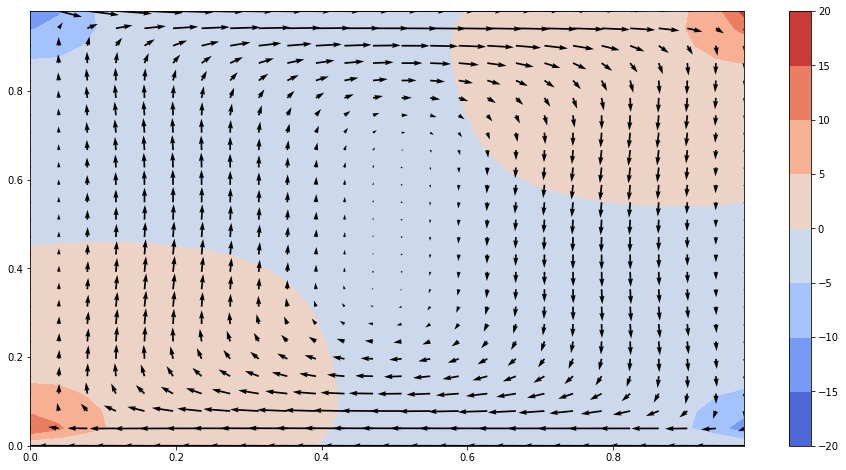

In [34]:
##initialization
spacetime.reset_domain()

X,Y,u_next,v_next,p_next = solve_navier_stokes_2D_Adams_Bashford(spacetime, water,True,4)

# The [::2, ::2] selects only every second entry (less cluttering plot)
#plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="coolwarm")
plt.colorbar()

plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
# plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
#plt.xlim((0, 1))
#plt.ylim((0, 1))
plt.show()

## Extension to Stokes Flow

As discussed, one the primary simplifications made to the full Navier Stokes equations involves the assumption of negligible viscosity.  This assumption allows for a reduction to the Euler equations, which has significant simplicity benefits and thus computational tractability [7].  However, much in the same way that the inviscid assumption leads to a significantly simplified governing equation, a similar simplification can be achieved by assuming the inertial forces within the flow to be negligible [9].

This type of flow is named Stokes Flow, and refers to flows in which the viscous effects of the flow structure are dominant to the point where inertial forces can be neglected [9].  Much like with Euler flow, the simplifications made to the governing equations of the fluid flow mean that it is only applicable to a specific subset of real world flows [5].  For this reason, care must be taken to ensure that the simplification to Stokes Flow is only undertaken in specific scenarios for which it is an appropriate simplification.

These scenarios include the simulation of fluids at very low Reynolds Numbers, which broadly includes fluid flows at very low pressures (such as in deep space) or with very viscous fluids [10].  In both of these cases, the inertia of the fluid flow is low in comparison to viscous effects (either because the density of the fluid is exceedingly low or because the viscosity of the fluid is exceedingly high), leading to the acceptability of the assumptions leading to Stokes Flow [10].  As an aside, it is intriguing that completely different assumptions regarding the flow structure can lead to very similar looking equations in both Euler and Stokes Flow.

In this section, we present a brief overview of the simplifications which allow the reduction of the full Navier Stokes equations to the equation governing Stokes Flow.  More importantly though, we use the foundations of Stokes Flow to embark on an exploration of the creation of fluid flow simulations.

Though we will not dive into a detailed derivation of the analytical equations here, we note that by assuming the fluid in question to be incompressible, and by linearizing the full equations in such a way that the (assumed to be) non-dominant inertia terms are neglected, we arrive at a general form of the equations as follows [9].  In this general notation, $\mu$ is the dynamic viscosity of the fluid, $p$ is the pressure, $u$ is the velocity vector, and $\mathbf{f}$ is any applied force which acts on the fluid.

$$
\mu \nabla ^{2}\mathbf {u} -{\boldsymbol {\nabla }}p+\mathbf {f} ={\boldsymbol {0}}
$$
$$
{\boldsymbol {\nabla }}\cdot  \mathbf {u} =0
$$

In the case of a two dimensional flow with no external force being applied on the fluid, we can rewrite the below equations in a more descriptive form.

$$
\mu \left({\frac {\partial ^{2}u}{\partial x^{2}}}+{\frac {\partial ^{2}u}{\partial y^{2}}}\right)-{\frac {\partial p}{\partial x}}=0
$$

and

$$
\mu \left({\frac {\partial ^{2}v}{\partial x^{2}}}+{\frac {\partial ^{2}v}{\partial y^{2}}}\right)-{\frac {\partial p}{\partial y}}=0
$$

and

$$
\frac{\partial u }{ \partial x}+\frac{\partial v }{ \partial y}=0
$$


Though it describes a very different type of flow scenario, the equations that govern Stokes flow (as indicated above) can be approached in a very similar way to that with which we approached the Euler Flow Equations above.  Namely, we can first apply a simple finite different scheme to each of the partial derivative terms.  In doing so, we would attain the following:

$$
\mu \left( \frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{\Delta x^2} + \frac{u_{i,j-1} - 2u_{i,j} + u_{i,j+1}}{\Delta y^2} \right) = \frac{p_{i+1,j}-p_{i,j}}{\Delta x}
$$

$$
\mu \left( \frac{v_{i-1,j} - 2v_{i,j} + v_{i+1,j}}{\Delta x^2} + \frac{v_{i,j-1} - 2v_{i,j} + v_{i,j+1}}{\Delta y^2} \right) = \frac{p_{i,j+1}-p_{i,j}}{\Delta y}
$$

$$
\frac{u_{i+1,j} - u_{i,j}}{\Delta x} + \frac{v_{i,j+1} - v_{i,j}}{\Delta y}
$$

These equations in their discretized forms represent a series of interlinked matrix equations which can be solved for in much the same approach as that with which we solved the Euler form of the simplified Navier Stokes Equations.  Not only are these equations in a relatively simple form to solve, they can be combined with the aforementioned and investigated methods in order to derive a time-stepping solution for developing a simulation of a given order.

### Finite Volume Methods

As described above, simplifications such as those introduced above in both the Euler equations and the Stokes equations are often critical building blocks on which we can enable the creation of feasible and efficient fluid simulations [12].  As such, we will use this section to introduce Finite Volume methods for the purposes of solving fluid flow structures.  We will do so by investigating the derivations of a couple of variations on Finite Volume methods, which will give us an understanding of the theoretical baseline on which these methods are founded.  

Before diving into the detailed mathematical derivation of the Finite Volume Methods (FVMs), we first must understand the way in which FVMs split up and operate on the domain for which the equations are defined.  In a typical finite differences scheme, the domain is split into a grid structure (usually regular in nature) in which each point is representative of a particular "point" within the domain being discretized.

However, with Finite Volume methods, the domain is instead discretized into a series of sub-domains which have an associated volume [13].  These sub-domains are referred to as control volumes and are treated as the average value of the sub-domain (or fluid in this case) for the purposes of calculations [13].  The values which are used for calculations represent an averaged value of each control volume, and it is this averaging which can allow for FVMs to provide a more efficient and faster solving algorithm ,while still maintaining acceptable levels of accuracy [13].

One of the most important equations in fluids is that of the divergence theorem (also reproduced above) [14].  It states, in this specific application, that fluid cannot be created or destroyed, and that changes to the density of a fluid within a finite volume (or element in the 2D case) must be caused by the flow of fluid into and out of the cell [14].  This can be represented mathematically as follows [13].  Note that his equation effectively conveys that the change in density within an arbitrary volume must be equal to the flux of that fluid across the boundaries of that volume.

$$
\oint_V (\nabla F) dV = \oint_S (F \cdot \hat{n}) dS
$$

If we now simplify our consideration to that of a square/cube Finite Element/Volume, the above statement is equivalent to stating that the change in density within the control volume is equal to the flux of fluid across the four edges of the finite element or 6 surfaces of the finite volume (as applicable).

We can then apply this analysis in an extended manner to the $x$ and $y$ momentum equations, as well as the continuity equations to derived the following [13].  Note that in these equations, we also make substitutions for the force acting on the fluid.

#### $x$ Momentum

$$
\oint_V \nabla (\rho U u) dV = \oint_V -\frac{\partial p}{\partial x} dV + \mu \oint_V \nabla^2 u \ dV
$$

This can be simplified as follows [13].

$$
\sum_i (\rho U \hat{n} u S)_{surface} = - \frac{\partial p}{\partial x} V + \mu \sum_i \nabla u \hat{n} S
$$

#### $y$ Momentum

Using a similar analysis, we can determine a similar discretization for the $y$ momentum [13].

$$
\sum_i (\rho U \hat{n} v S)_{surface} = - \frac{\partial p}{\partial y} V + \mu \sum_i \nabla v \hat{n} S
$$

#### Continuity

Finally, we can apply a similar (but simplified) version of the above analysis in order to obtain the following discretized version of the continuity equation [13].

$$
\sum_i (\rho U \hat{n} S) = 0
$$


Using the above three discretized versions of the finite volume equations, we have achieved a programable system of discretized equations for the purposes of building a fluid simulation based on the simplified Navier Stokes equation (or even further simplifications of it) which bases it discretization not on discrete points of the domain, but rather considers regions and volumes of sub-domains within the flow.

In the above analysis and derivation, we have implicitly assumed that the chosen control volumes are square (or at least rectangular) in nature.  While this does not impact the generalizability of the derivations (which can be easily adapted [13]), it is worth noting that a wide range of discretization patterns are available and suitable for use in fluid simulations [13].  These can include cartesian grids which consist of varying sizes of square/rectangular control elements/volumes on a regula grid, or even non-uniform quadrilaterals and polygons [13].

In fact, the field of grid generation in fluid simulation domains is a rapidly growing one, with much work going into the research of how splitting up a domain into sub-domains affect solution efficiency and stability [15].

### Solving Finite Volume Methods

With the methodologies introduced above, it now becomes possible to devise methods of solving a particular fluid structure using iterative finite volume methods [13].  As introduced above, these "time-marching-like" schemes operate on a mesh of sub-domains or control volumes, with each control volume approximated as an average of that particular value within the control volume in question [13].

Much as with simpler discretization schemes, there remains a significant problem of closure, with 7 separate variables needed to be solved within each control volume [13].  Namely, these 7 variables to be solved for are the mass flux through the boundary of the control volume, the flow velocities across each of the control volume boundaries, the gradients of these respective velocities, and finally the pressure gradients acting on the surface of the control volume [13].

As can be seen, there is a degree of circularity here, with the velocities being unknown, but required to solve the equations themselves (See full Navier Stokes equations above).  Thus, the first such method for solving these equations is by the iterative method, where a guess velocity and pressures are first used to solve the equations, with these guesses being refined on subsequent runs until convergence [13].  Thus, in this methodology, each timestep will contain a series of iterations until convergence, with the associated computational inefficiencies [16].

Another potential methodology for solving the discretized version of the finite volume discretized Navier Stokes equations is by considering the diffusive, convective and pressure terms seperately [13].  Above, we showed that the discretization of the Navier Stokes equations can be considered to be three equations: the x momentum, y momentum and continuity equations respectively.

Focussing on the two momentum equations, it can be shown that the left side of the equations (as shown above) is the convective term, with the remaining terms of the momentum equations making up the pressure and diffusive terms from left to right as shown above [13].

A series of normalized coordinates can then be defined and introduced into the diffusive term, which allows the momentum equations to be rewritten in a simpler form as shown below ($x$ and $y$ momentum equations respectively) [13].  In these equations, $a$ and $b$ are terms introduced in the normalization of the parameter space and are fully defined in [13].

$$
a_P u_P = \sum_{nb}(a_E u_E) - \frac{\partial p}{\partial x} V
$$

$$
a_P v_P = \sum_{nb}(a_E v_E) - \frac{\partial p}{\partial y} V
$$

The pressure terms of the above equations can then be dealth with using a least squares methodology involving a Taylor expansion of all adjacent control volumes to a given control volume [13].  To do this, we first perofmr the Taylor Expansion of the pressure between the control volume in question and each of its neighbors.  The equation below shows this for a given control volume $B$ and it's neighbor $i$ [13].

$$
P_i = P_B + \frac{\partial p}{\partial x}(x_i - x_B) + \frac{\partial p}{\partial y} (y_i - y_B)
$$

When the above equation is defined for every single one of a given control volume's neighbors, a system of equations is then defined which can be solved using a least squares methodology as shown below [13].

$$
\begin{bmatrix} x_1 - x_B & y_1 - y_B \\ x_2 - x_B & y_2 - y_B \\ x_3 - x_B & y_3 - y_B \\ x_4 - x_B & y_4 - y_B \\ \vdots & \vdots \\ x_n - x_B & y_n - y_B \\  \end{bmatrix} \begin{bmatrix} \frac{\partial p}{\partial x} \\ \frac{\partial p}{\partial y} \end{bmatrix} = \begin{bmatrix} P_1 \\ P_2 \\ P_3 \\ P_4 \\ \vdots \\ P_n \end{bmatrix}
$$

Finally, the convective term is typically found through interpolation of the momentum equations in order to reduce the oscillatory behaviou which is typically observed when the convective term is calculated directly from the mass flow flux [13].

## References

[1] Constantin, Peter, and Ciprian Foias. Navier-stokes equations. University of Chicago Press, 2020.

[2] Gilles, Pierre, and Lemarié Rieusset. The Navier∼ Stokes Problem in the 21st Century. Chapman and Hall/CRC, 2018. APA	

[3] Bristeau, Marie Odile, Roland Glowinski, and Jacques Periaux. "Numerical methods for the Navier-Stokes equations. Applications to the simulation of compressible and incompressible viscous flows." Computer Physics Reports 6.1-6 (1987): 73-187. APA	

[4] Spalart, Philippe R. "Strategies for turbulence modelling and simulations." International journal of heat and fluid flow 21.3 (2000): 252-263. APA	

[5] Moser, R. D., P. Moin, and A. Leonard. "A spectral numerical method for the Navier-Stokes equations with applications to Taylor-Couette flow." Journal of Computational Physics 52.3 (1983): 524-544. APA	

[6] Vieillefosse, P. "Internal motion of a small element of fluid in an inviscid flow." Physica A: Statistical Mechanics and its Applications 125.1 (1984): 150-162.

[7] Jameson, Antony. "Numerical solution of the Euler equations for compressible inviscid fluids." Numerical methods for the Euler equations of Fluid Dynamics 1 (1985).

[8] Basu, B. C., and G. J. Hancock. "The unsteady motion of a two-dimensional aerofoil in incompressible inviscid flow." Journal of Fluid Mechanics 87.1 (1978): 159-178.

[9] Koplik, Joel. "Creeping flow in two-dimensional networks." Journal of Fluid Mechanics 119 (1982): 219-247.

[10] Kim, S. & Karrila, S. J. (2005) Microhydrodynamics: Principles and Selected Applications, Dover. ISBN 0-486-44219-5.

[11] Hairer, Ernst, Gerhard Wanner, and Syvert P. Nørsett. "Multistep methods and general linear methods." Solving Ordinary Differential Equations I: Nonstiff Problems (1993): 355-474.

[12] Randall L., Finite Volume Methods for Hyperbolic Problems, Cambridge University Press, 2002.

[13] Tan, J.,A STUDY OF SOLVING NAVIER-STOKES EQUATIONS WITH A FINITE
VOLUME METHOD BASED ON POLYGONAL UNSTRUCTURED GRIDS AND THE COMPUTATIONAL ANALYSIS OF GROUND VEHICLE AERO- DYNAMICS, 2010

[14] Pfeffer, W. F. "The divergence theorem." Transactions of the American Mathematical Society 295.2 (1986): 665-685.

[15] Edelsbrunner, Herbert (2001), Geometry and Topology for Mesh Generation, Cambridge University Press, ISBN 9780521793094

[16] S. Patankar, Numerical Heat Transfer and Fluid Flow (1980), ISBN 0891165223